In [1]:
!mkdir -p ~/aiffel/celebrities/images

In [2]:
!gsutil cp gs://chem_dsrc/AttentiveFP/aiffel/images.zip ./

Copying gs://chem_dsrc/AttentiveFP/aiffel/images.zip...
- [1 files][ 13.5 MiB/ 13.5 MiB]                                                
Operation completed over 1 objects/13.5 MiB.                                     


In [7]:
!unzip images.zip -d ~/aiffel/celebrities/images/

Archive:  images.zip
replace /root/aiffel/celebrities/images/images/my_image1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
ls ~/aiffel/celebrities/images/

images/


In [8]:
import os

dir_path = os.getenv('HOME')+'/aiffel/celebrities/images/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

# 작업 환경에 따라 혹시나 뜰 수 있는 ".ipynb_checkpoints"를 제거한 리스트를 만들어줄게요.
file_list = list(filter(lambda file: not file.startswith("."), file_list))

print(file_list)

file_list: ['haesun.jpg', 'jaenee.jpg', 'suji.jpeg', 'sulhyeon.orig', 'my_image0.jpg', 'irin.jpeg', 'my_image2.jpg', 'iu.jpeg', 'sullee.jpg', 'my_image1.jpg', 'taehee.jpeg', 'yeonhee.jpeg', 'sohee.jpeg']
['haesun.jpg', 'jaenee.jpg', 'suji.jpeg', 'sulhyeon.orig', 'my_image0.jpg', 'irin.jpeg', 'my_image2.jpg', 'iu.jpeg', 'sullee.jpg', 'my_image1.jpg', 'taehee.jpeg', 'yeonhee.jpeg', 'sohee.jpeg']


In [10]:
!pip install face_recognition
import face_recognition

def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

     |████████████████████████████████| 100.1 MB 8.5 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=6804bba8a74dc4312a56c85dcbaf9060d43e49e700c40e14b1c5b79b2ede3b29
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


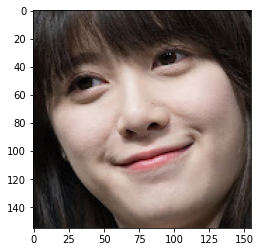

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

image_path = os.path.join(dir_path, file_list[0])
face = get_cropped_face(image_path)
plt.imshow(face)

In [12]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


In [13]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    file_list = list(filter(lambda file: not file.startswith("."), file_list))
    embedding_dict = {}
    
    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        embedding = get_face_embedding(face)
				
        # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
        # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
				
        if len(embedding) > 0:  
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]
        
    return embedding_dict

In [14]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict["elon_musk"]

IndexError: ignored

In [15]:
file_list = os.listdir(dir_path)

In [16]:
file_list = list(filter(lambda file: not file.startswith("."), file_list))

In [17]:
file_list

['haesun.jpg',
 'jaenee.jpg',
 'suji.jpeg',
 'sulhyeon.orig',
 'my_image0.jpg',
 'irin.jpeg',
 'my_image2.jpg',
 'iu.jpeg',
 'sullee.jpg',
 'my_image1.jpg',
 'taehee.jpeg',
 'yeonhee.jpeg',
 'sohee.jpeg']

In [18]:
embedding_dict = {}

In [24]:
for file in file_list : 
  img_path = os.path.join(dir_path, file)

  face = get_cropped_face(img_path)
  embedding = get_face_embedding(face)

  if len(embedding) > 0:  
      embedding_dict[os.path.splitext(file)[0]] = embedding[0]

IndexError: ignored

In [25]:
img_path

'/root/aiffel/celebrities/images/images/my_image0.jpg'

In [26]:
image_file = img_path
image = face_recognition.load_image_file(image_file)
face_locations = face_recognition.face_locations(image)
a, b, c, d = face_locations[0] #어떤 이미지는 location이 안 나올 수도 있다.
cropped_face = image[a:c,d:b,:]

IndexError: ignored

In [29]:
face_recognition.face_locations(image)

[]

In [30]:
embedding_dict

{'haesun': array([-0.05387694,  0.08855701,  0.06617332, -0.03894994, -0.12698725,
        -0.03556518, -0.05942687, -0.04317874,  0.12017793, -0.16201156,
         0.22483942, -0.08905416, -0.2511006 , -0.08292222, -0.04374349,
         0.21762465, -0.20115016, -0.16153142, -0.03548813, -0.0119311 ,
         0.11531415,  0.06691018,  0.01178235,  0.01915296, -0.11889158,
        -0.3476353 , -0.07277051, -0.02390775, -0.03758565, -0.09202769,
        -0.04749797,  0.006885  , -0.17677818, -0.04257508,  0.07147045,
         0.15830801, -0.01143529, -0.10685232,  0.1351188 ,  0.00685522,
        -0.24193893,  0.02650798,  0.07897563,  0.25761628,  0.14753094,
        -0.0084953 , -0.01182912, -0.17869787,  0.15375146, -0.18730354,
         0.05512054,  0.14386432,  0.06041703,  0.08272994,  0.05293078,
        -0.09226407,  0.04629697,  0.18258917, -0.10690682, -0.02328894,
         0.09984773, -0.02401912,  0.01074305, -0.12748921,  0.17766958,
         0.00617345, -0.10294811, -0.2736

In [33]:
import numpy as np

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

# 내 사진들 두 장이 얼마나 비슷한지 확인해볼까요?
get_distance("sulhyeon", "suji")  # 내 사진 두 장의 이름을 파라미터로 넣어주세요

0.4689418339864124

In [34]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

# 이렇게 생성된 함수 sort_key_func는 sort_key_func(name2) 라고 호출할 때 name1과 name2 사이의 임베딩 벡터 거리를 계산합니다.
# 여기서의 name1은 내 사진의 이름일 것입니다.